# UCI Heart Disease Data kaggle

### Installing required dependencies

### Importing required dependencies

In [446]:
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import matplotlib.pyplot as plt


### Reading dataset file

In [447]:
df = pd.read_csv("heart_disease_uci.csv")
df.drop(columns= ["dataset","id"],inplace=True)

### Looking at dataset to assess the fields which need to be preprocessed

In [448]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [449]:
df.count()

age         920
sex         920
cp          920
trestbps    861
chol        890
fbs         830
restecg     918
thalch      865
exang       865
oldpeak     858
slope       611
ca          309
thal        434
num         920
dtype: int64

In [450]:
# ********************** may be change with seperate the fields *********************

df.fbs = df.fbs.fillna(False)
df.exang =df.exang.fillna(False)

df.sex = df.sex.replace({"Male": 1,"Female": 0})
df.fbs = df.fbs.replace({True: 1,False: 0})
df.exang = df.exang.replace({True: 1,False: 0})


In [451]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,typical angina,145.0,233.0,1,lv hypertrophy,150.0,0,2.3,downsloping,0.0,fixed defect,0
1,67,1,asymptomatic,160.0,286.0,0,lv hypertrophy,108.0,1,1.5,flat,3.0,normal,2
2,67,1,asymptomatic,120.0,229.0,0,lv hypertrophy,129.0,1,2.6,flat,2.0,reversable defect,1
3,37,1,non-anginal,130.0,250.0,0,normal,187.0,0,3.5,downsloping,0.0,normal,0
4,41,0,atypical angina,130.0,204.0,0,lv hypertrophy,172.0,0,1.4,upsloping,0.0,normal,0


### These columns are filled with respective required value instead of NaN

In [452]:
# With mean as it's indicating blood pressure at rest
df.trestbps = df.trestbps.fillna(np.mean(df.trestbps))

# with mean as it's indicating cholesterol level of person
df.chol = df.chol.fillna(np.mean(df.trestbps))

# with mean as it's indicating Max heart rate achieved
df.thalch = df.thalch.fillna(np.mean(df.thalch))


# with mean as it's indicating Max heart rate achieved
df.oldpeak = df.oldpeak.fillna(np.mean(df.oldpeak))

# In a normal the major blood vessel is 0 so we considered that
df.ca = df.ca.fillna(0)




In [453]:
df.count()

age         920
sex         920
cp          920
trestbps    920
chol        920
fbs         920
restecg     918
thalch      920
exang       920
oldpeak     920
slope       611
ca          920
thal        434
num         920
dtype: int64

### Doing one hot encoding

In [454]:
one_hot_encoded = pd.get_dummies(df,prefix=None,prefix_sep="_")
one_hot_encoded
# one_hot_encoded.nunique()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,1,145.000000,233.0,1,150.000000,0,2.300000,0.0,0,...,1,1,0,0,1,0,0,1,0,0
1,67,1,160.000000,286.0,0,108.000000,1,1.500000,3.0,2,...,0,1,0,0,0,1,0,0,1,0
2,67,1,120.000000,229.0,0,129.000000,1,2.600000,2.0,1,...,0,1,0,0,0,1,0,0,0,1
3,37,1,130.000000,250.0,0,187.000000,0,3.500000,0.0,0,...,0,0,1,0,1,0,0,0,1,0
4,41,0,130.000000,204.0,0,172.000000,0,1.400000,0.0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,127.000000,333.0,1,154.000000,0,0.000000,0.0,1,...,0,0,0,1,0,0,0,0,0,0
916,62,1,132.132404,139.0,0,137.545665,0,0.878788,0.0,0,...,1,0,0,1,0,0,0,0,0,0
917,55,1,122.000000,223.0,1,100.000000,0,0.000000,0.0,2,...,0,0,0,1,0,0,0,1,0,0
918,58,1,132.132404,385.0,1,137.545665,0,0.878788,0.0,0,...,0,1,0,0,0,0,0,0,0,0


<AxesSubplot:>

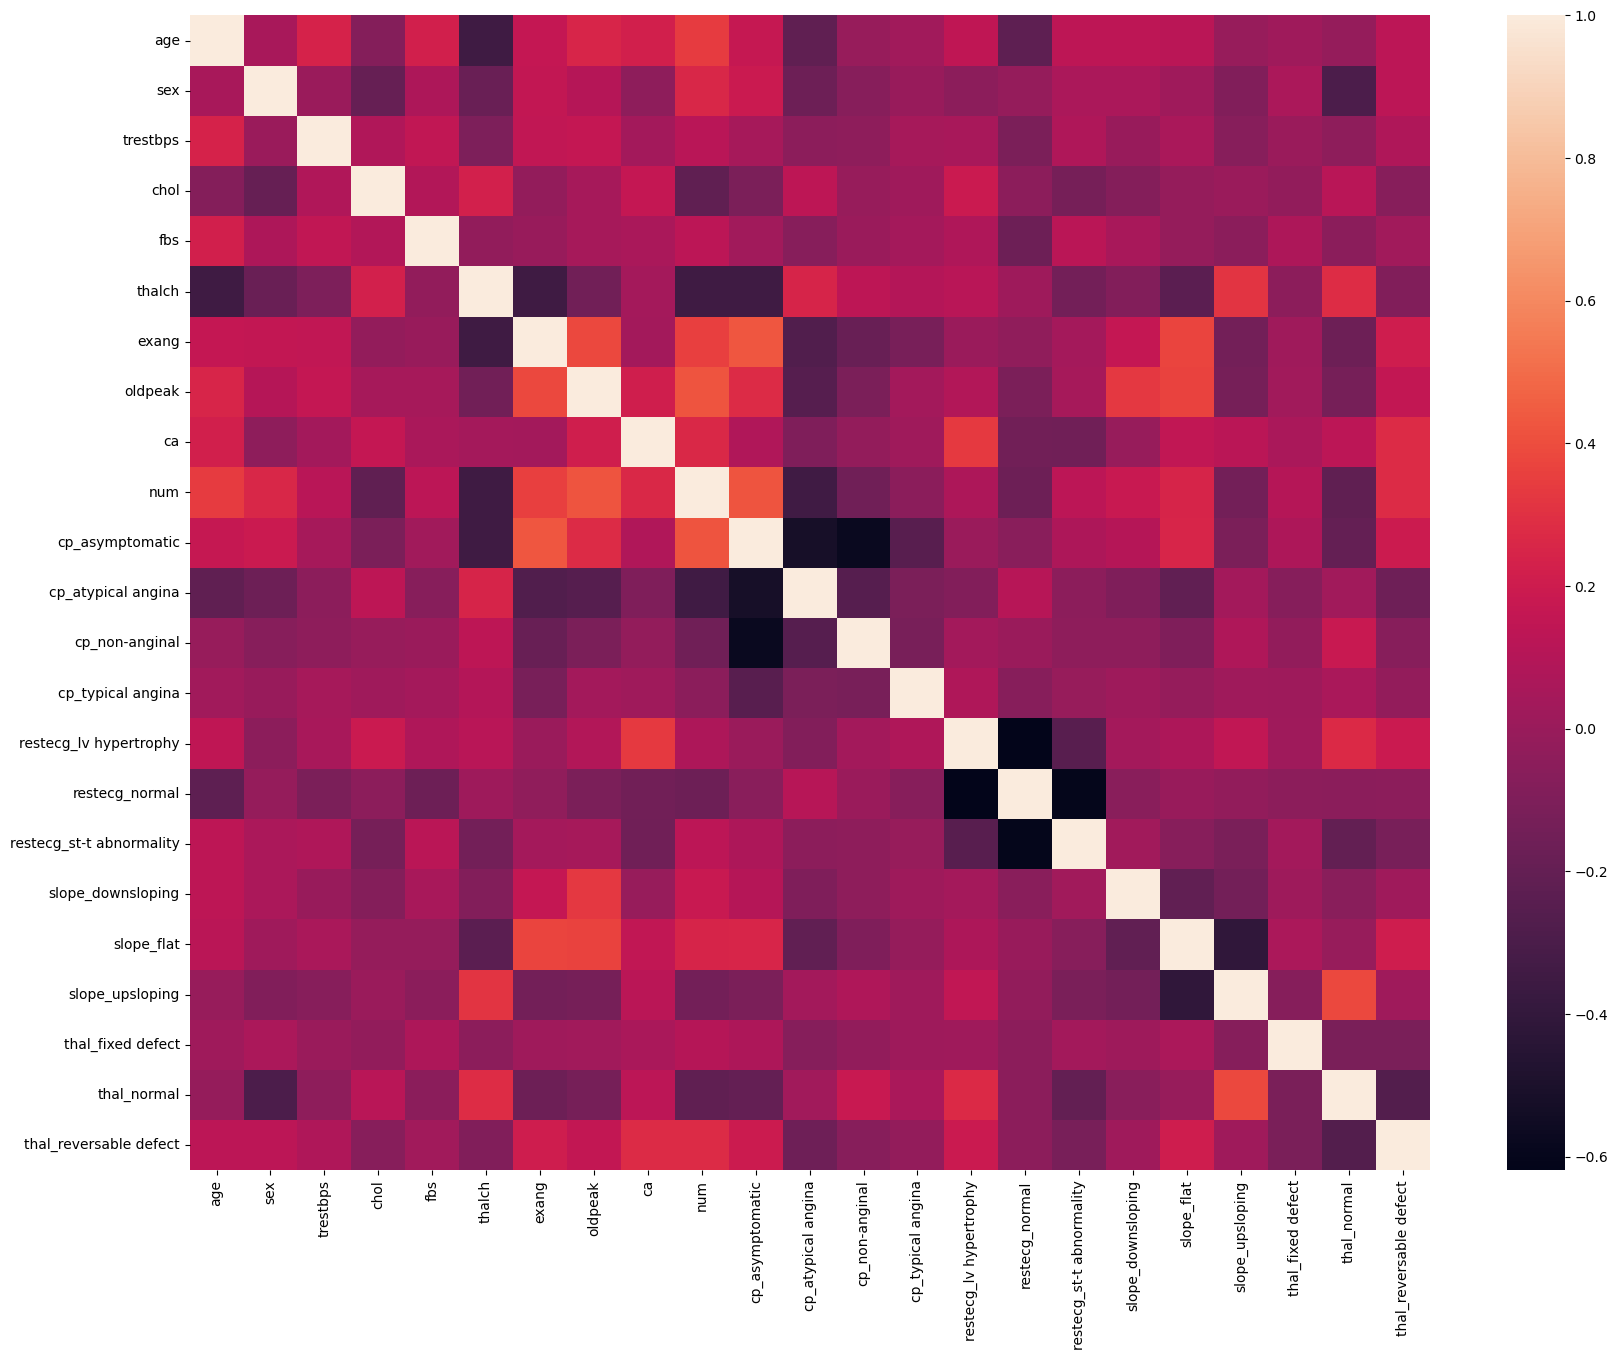

In [455]:
plt.subplots(figsize=(20,15))
sns.heatmap(one_hot_encoded.corr())


In [456]:
corr = one_hot_encoded.corr()

### Removing the attribute which have very high correlation

In [457]:
# one_hot_encoded.corr()
# remove the attribute which has very highly correlated 
for row in corr.columns:
    for col in corr.columns:
        if row == 'num' or col == 'num' or row == col:
            continue
        if abs(corr[row][col]) >= 0.4:
            print(row,col)

exang cp_asymptomatic
cp_asymptomatic exang
cp_asymptomatic cp_atypical angina
cp_asymptomatic cp_non-anginal
cp_atypical angina cp_asymptomatic
cp_non-anginal cp_asymptomatic
restecg_lv hypertrophy restecg_normal
restecg_normal restecg_lv hypertrophy
restecg_normal restecg_st-t abnormality
restecg_st-t abnormality restecg_normal
slope_flat slope_upsloping
slope_upsloping slope_flat


### Removing the attribute which has very less correlation with target class.

In [458]:
for attr in corr.columns:
    if attr != 'num' and abs(corr[attr]['num']) <= 0.1 :
        print(attr)


cp_typical angina
restecg_lv hypertrophy


In [459]:
df = one_hot_encoded

In [460]:
df.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,1,145.0,233.0,1,150.0,0,2.3,0.0,0,...,1,1,0,0,1,0,0,1,0,0
1,67,1,160.0,286.0,0,108.0,1,1.5,3.0,2,...,0,1,0,0,0,1,0,0,1,0
2,67,1,120.0,229.0,0,129.0,1,2.6,2.0,1,...,0,1,0,0,0,1,0,0,0,1
3,37,1,130.0,250.0,0,187.0,0,3.5,0.0,0,...,0,0,1,0,1,0,0,0,1,0
4,41,0,130.0,204.0,0,172.0,0,1.4,0.0,0,...,0,1,0,0,0,0,1,0,1,0


In [461]:
# HeartStandard = StandardScaler().fit(df[["age","trestbps","chol","thalch","oldpeak"]])

In [462]:
# temp = HeartStandard.transform(df[["age","trestbps","chol","thalch","oldpeak"]])

In [463]:
# df.age = temp[ :,0]
# df.trestbps = temp[ :,1]
# df.chol = temp[:,2]
# df.thalch = temp[:, 3]
# df.oldpeak = temp[:,4]

In [464]:
df.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,1,145.0,233.0,1,150.0,0,2.3,0.0,0,...,1,1,0,0,1,0,0,1,0,0
1,67,1,160.0,286.0,0,108.0,1,1.5,3.0,2,...,0,1,0,0,0,1,0,0,1,0
2,67,1,120.0,229.0,0,129.0,1,2.6,2.0,1,...,0,1,0,0,0,1,0,0,0,1
3,37,1,130.0,250.0,0,187.0,0,3.5,0.0,0,...,0,0,1,0,1,0,0,0,1,0
4,41,0,130.0,204.0,0,172.0,0,1.4,0.0,0,...,0,1,0,0,0,0,1,0,1,0


In [465]:
df.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak',
       'ca', 'num', 'cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal',
       'cp_typical angina', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'slope_downsloping', 'slope_flat',
       'slope_upsloping', 'thal_fixed defect', 'thal_normal',
       'thal_reversable defect'],
      dtype='object')

In [466]:
# for col in df.columns:
#     print(np.isnan(df[[col]].any()))
#     print(np.isfinite(df[[col]].all()))

# print(np.isnan(df.any()))
# print(np.isfinite(df.all()))
# np.any(np.isnan(df))

### Splitting Label with other fields

In [467]:
X = df.drop(columns = ["num"],axis = 1)
Y = df["num"]

### Attributes without Label

In [468]:
X.head()    

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,cp_asymptomatic,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,1,145.0,233.0,1,150.0,0,2.3,0.0,0,...,1,1,0,0,1,0,0,1,0,0
1,67,1,160.0,286.0,0,108.0,1,1.5,3.0,1,...,0,1,0,0,0,1,0,0,1,0
2,67,1,120.0,229.0,0,129.0,1,2.6,2.0,1,...,0,1,0,0,0,1,0,0,0,1
3,37,1,130.0,250.0,0,187.0,0,3.5,0.0,0,...,0,0,1,0,1,0,0,0,1,0
4,41,0,130.0,204.0,0,172.0,0,1.4,0.0,0,...,0,1,0,0,0,0,1,0,1,0


### Label

In [469]:
Y.head()

0    0
1    2
2    1
3    0
4    0
Name: num, dtype: int64

# Model Training

### Splitting training and testing data 

In [470]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, stratify = Y,random_state = 0)

In [471]:
# mnb = MultinomialNB()
# mnb.fit(X_train,Y_train)

In [472]:
lr = LogisticRegression(multi_class='multinomial',max_iter= 10000)
lr.fit(X_train,Y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [473]:
Y_predict = lr.predict(X_test)
score = accuracy_score(Y_predict,Y_test)
print("Accuracy Score:",score)

Accuracy Score: 0.605072463768116


### testing for different random states

In [474]:
# for state in range(10,20):
#     X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, stratify = Y,random_state = state)
#     lr = LogisticRegression(multi_class='multinomial',max_iter= 10000)
#     lr.fit(X_train,Y_train)
#     Y_predict = lr.predict(X_test)
#     score = accuracy_score(Y_predict,Y_test)
#     print("Accuracy Score:",score)

In [475]:
# Y_predict = lr.predict_proba(X_test)
# print(Y_predict)

In [476]:
# create a dataframe with actual and predicted values
# temp = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_predict})
# print(temp.to_string())

### Saving the Model

In [477]:
### Saving MNB model
pickle.dump(lr,open("heart_lr.sav","wb"))

In [478]:
lr.feature_names_in_
for feature in lr.feature_names_in_:
    print(feature)

age
sex
trestbps
chol
fbs
thalch
exang
oldpeak
ca
cp_asymptomatic
cp_atypical angina
cp_non-anginal
cp_typical angina
restecg_lv hypertrophy
restecg_normal
restecg_st-t abnormality
slope_downsloping
slope_flat
slope_upsloping
thal_fixed defect
thal_normal
thal_reversable defect


In [480]:
df.nunique()

age                          50
sex                           2
trestbps                     62
chol                        218
fbs                           2
thalch                      120
exang                         2
oldpeak                      54
ca                            4
num                           5
cp_asymptomatic               2
cp_atypical angina            2
cp_non-anginal                2
cp_typical angina             2
restecg_lv hypertrophy        2
restecg_normal                2
restecg_st-t abnormality      2
slope_downsloping             2
slope_flat                    2
slope_upsloping               2
thal_fixed defect             2
thal_normal                   2
thal_reversable defect        2
dtype: int64

In [481]:
df.describe()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,...,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,0.789130,132.132404,196.945622,0.150000,137.545665,0.366304,0.878788,0.227174,0.995652,...,0.050000,0.204348,0.598913,0.194565,0.068478,0.375000,0.220652,0.050000,0.213043,0.208696
std,9.424685,0.408148,18.443895,109.606197,0.357266,25.138494,0.482056,1.053774,0.628936,1.142693,...,0.218063,0.403444,0.490385,0.396081,0.252702,0.484386,0.414912,0.218063,0.409681,0.406597
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,120.000000,164.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,221.000000,0.000000,138.000000,0.000000,0.800000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,60.000000,1.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,0.000000,2.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,3.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
